# **Universidad Galileo**

## **Ciencia de Datos en Python**

### **César Luis Polanco, 20062088**

# NumPy y algebra lineal(parte 2) 

Ya hemos estudiado el objeto básico en álgebra lineal: **el vector**, algunos de sus usos e interpretaciones, así como la forma de trabajar con estos en Python a través de NumPy, funciones matemáticas útiles y comunes entre otras cosas.
 
Además mencionamos el objeto general **Tensor** y su equivalente en NumPy : **np.ndarray**.
 
En esta parte del curso nos enfocamos en otro objeto muy importante en álgebra lineal y en ciencia de datos: **la matriz**.
 
Muchas de las cosas que aprendimos en vectores aplican también a matrices,algunas exactamente igual, algunas con pequeñas variaciones, y algunas otras sí son específicas .De manera similar muchas cosas que aprenderemos en matrices también aplican y son consistentes en el caso mas general: **arreglos multidimensionales(o tensores matemáticamente)** de manera que podemos generalizar mucho de lo aprendido.

## ¿Por que estudiamos matrices en ciencia de datos?

Similar al caso de vectores, usamos matrices para almacenar y operar en colecciones de datos.

Cuando estudiamos previamente vectores , lo
s vectores representaban en la mayoría de casos 2 tipos de información:

* Una única observación o entidad con múltiples características: Por ejemplo los ejemplos de distribuciones discretas de probabilidad usadas en los ejemplos de entropía,una única observación con múltiples características(la probabilidad de ocurrencia de cada valor).
* Múltiples observaciones o entidades, con una sola característica: cuando hicimos el ejemplo de medias móviles teniamos múltiples observaciones o entidades(cada punto de datos) pero cada observación tenia una sola característica.

Esto puede bastar en muchos casos, pero para la mayoría de problemas trabajaremos con  muchas observaciones que poseen más de una característica. Por lo cual necesitamos una estructura más general que nos permita hacer esto, la estructura que nos permite hacer esto es lo que conocemos en matemática como **matriz** y en programación comúnmente llamamos **arreglo bi-dimensional**.

**nota**: desafortunadamente el término dimension(y su derivado :dimensional) puede llegar a ser ambiguo , por ejemplo  : un vector bi-dimensional es algo completamente diferente a un arreglo bi-dimensional ,el vector bi-dimensional es una colección de 2 elementos mientras que el arreglo bi-dimensional es una estructura tabular que requiere de 2 coordenadas(o indices) para ser accedido.

## ¿Que es una matriz?

Hay diversas definiciones de matriz, siendo la más común: **un arreglo bidimensional de números**. Algunas otras definiciones desde el punto de vista matemático son:
 
* Conjunto de números distribuidos ORDENADAMENTE de forma rectangular formando filas y columnas.
* Tabla de números ORDENADOS.
* Colección tabular de elementos distribuidos en filas y columnas.
 
En matemática la definición suele estar orientada e incluso limitada a números(se dice que una matriz es una colección de elementos que pueden ser sumados y multiplicados) ,en programación se extiende un poco esto y podemos trabajar en algunos casos con colecciones rectangulares de otros tipos de objetos , para efectos de ciencia de datos nos enfocamos mayormente también en matrices como:**colecciones de números organizados de manera rectangular(distribuidos en filas y columnas)**.
 
En matemática comúnmente denotamos las matrices con letras mayúsculas, esta es una práctica que a veces adoptamos también en programación.


<img src="https://ekuatio.com/wp-content/uploads/tipos-de-matrices-12.png"/>



### Dimension o tamaño de una matriz

El tamaño o dimensión de una matriz nos indica cuantos elementos esta posee y cómo estos se organizan en filas y columnas, comúnmente denotamos el tamaño o dimensión como:
$$ m x n $$
 
* m = número de filas: comúnmente número de observaciones, entidades o eventos
* n = número de columnas : número de características de interés o descriptivas de cada elemento.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/Matrix.svg/1200px-Matrix.svg.png">

**Nota** : esto no es un estandar y pueden llegar a variar:
* encontrarse casos donde la data este organizada por columna siendo m = número de columnas y n = número de filas.
* En computer visión aveces se toman las posiciones en filas de abajo hacia arriba.
### Ejemplos:

* En Machine Learning para datos estructurados comunmente trabajamos con muchas observaciones llamadas "ejemplos de entrenamiento" donde cada ejemplo esta caracterizado por múltiples características(llamadas features en ML), para esto usamos una matriz.
* En analisis de correlación entre variables podemos almacenar múltiples variables para múltiples observaciones.
* En deep learnig los parametros(pesos sinapticos) de una red neuronal  son representados como matrices 

<img src="https://raw.githubusercontent.com/llealgt/Galileo_Python_DS/main/NumPy_algebra_lineal/matriz_34.png"/>

## Matriz como Tensor

Tal como ya hemos mencionado, el objeto mas general en algebra lineal es el **tensor** y tanto vectores como matrices son un **tensor** , la característica que determina cuando un tensor es una matriz o un vector es el **rango del tensor**, el rango es un entero que nos indica cuantos valores necesitamos para poder acceder o especificar a un elemento dentro del tensor.
 
* **Escalares**Tensor de rango 0, puesto que son un único elemento numérico y no pertenecen a una colección , no tiene sentido la noción de tener un número indicando su posición en una colección.
* **Vectores**Tensor de rango 1, lo conceptualizamos como una lista de elementos por lo tanto necesitamos 1 número para especificar la posición de cierto elemento en la lista.
* **Matriz**: tensor de rango 2, pensamos en la matriz como una colección de números organizados de forma  rectangular en filas y columnas por lo tanto para acceder o especificar un elemento de la matriz necesitamos 2 números : 1 para la fila(que comúnmente representamos con "i") y otro para la columna(que comúnmente representamos con "j") en la que se encuentra cierto elemento.

## Representación o interpretación geométrica/gráfica de una matriz

Tal como vimos que un vector podía tener una representación geométrica como puntos en el espacio(o flechas apuntando del origen a puntos) una matriz también interpretarse de manera geométrica o gráfica, hablaremos un poco de esto en el futuro :

* **Matriz como transformación del espacio(y como función)**

<img src="https://thumbs.gfycat.com/HealthyPerfectHaddock-max-1mb.gif">

<img src="https://thumbs.gfycat.com/SmartNearAmericancrocodile-max-1mb.gif">

## Matrices en NumPy

En NumPy las matrices son(de manera similar a los vectores) son objetos del tipo **np.ndarray**, la diferencia es la forma en que estos estan organizados y por lo tanto ciertas características de los mismos. Para una matriz tenemos que:
 
* **ndim**: el rango es igual a 2
* **shape** : la forma o tamaño de la matriz es una **tupla de la forma (m,n)** con m siendo el número de filas y $n$ el número de columnas. De manera similar muchas funciones  para crear matrices utilizan como parámetro una tupla para definir la forma en la que será creada.

In [1]:
## Para poder utilizar numpy debemos importar el paquete, es casi un estandar de la industria importarlo bajo el alias **"np"**
import numpy as np

In [2]:
matriz_ceros = np.zeros((3,4))
tamaño_matriz = matriz_ceros.shape

print("Rango del tensor:",matriz_ceros.ndim) #rango del tensor, para matriz es 2
print("Forma o tamaño:",tamaño_matriz) # tupla representando el tamaño de la matríz

print("Matriz de ceros de forma:",tamaño_matriz)
print("Filas:",tamaño_matriz[0])
print("Columnas:",tamaño_matriz[1])
print("Matriz:")
print(matriz_ceros)

Rango del tensor: 2
Forma o tamaño: (3, 4)
Matriz de ceros de forma: (3, 4)
Filas: 3
Columnas: 4
Matriz:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


## Visualización de datos en Python
 
Con el conocimiento que ya poseemos para trabajar con Python y Numpy, y el conocimiento de matrices podemos empezar a estudiar un tema muy importante en ciencia de datos: **visualización de datos**.
 
La visualización de datos es sumamente importante y tiene muchos usos, es una herramienta esencial en la fase de todo proyecto de data science conocida como **"análisis exploratorio de datos"**.
 
### Análisis exploratorio de datos
 
El análisis exploratorio de datos , tal y como su nombre indica nos permite explorar, entender, conocer y familiarizarnos con los datos,lo cual es muy recomendable en todo proyecto y se recomienda hacerlo antes de empezar a hacer pruebas de hipótesis, modelado matemático/estadístico o modelado por machine learning o cualquier otra técnica  de ciencia de datos.


<img src="https://cdn-images-1.medium.com/max/1200/1*vJULpN2xQfyVsvTVW-JSkA.png">

### Otros usos

Además del análisis exploratorio de datos, la visualización de los mismos es muy útil y aplicado en muchas otras áreas:
 
* Modelación y simulación: análisis del comportamiento de una variable bajo análisis a través de simulación.

<img src="https://risk-engineering.org/static/img/large/monte-carlo-VaR.png">
* Curvas de aprendizaje: durante el desarrollo de un proyecto de ML es necesario evaluar el funcionamiento de un modelo de ML y su comportamiento a través del tiempo durante el entrenamiento.

<img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/10/Line-Plot-of-Train-and-Test-Loss-During-Training-With-Simple-Early-Stopping.png">
* Comparar modelo de ML vs datos reales
<img src="https://s3.amazonaws.com/stackabuse/media/linear-regression-python-scikit-learn-1.png">
* Visualización de imagenenes en proyectos de vision por computadora.
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQY4FRGTsV_ugt6DyJmolPHiiaDH3lLCEaGSuh_ZN0NUjrOM_VE7Q">


Existen diversos paquetes para visualizacion de datos en Python,pero el mas popular, usado y conocido en la industria es: 
#### Matplotlib

# Instalar matplotlib desde el jupyter notebook en el ambiente actual de Anaconda
# esto puede ser realizado de manera tradicional con linea de comandos o Anaconda Navigator
import sys
#!conda install --yes --prefix {sys.prefix} matplotlib

# ! ejecuta un comando del sistema desde el notebook, el comando ejecutado fue:
print("Comando ejecutado:conda install --yes --prefix {"+sys.prefix+"} matplotlib")

In [3]:
import matplotlib.pyplot as plt

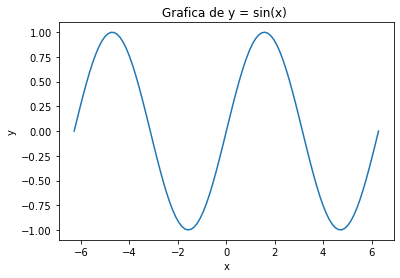

In [4]:
x = np.linspace(-2*np.pi,2*np.pi,100)
y = np.sin(x)

plt.plot(x,y)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Grafica de y = sin(x) ')


plt.savefig('sinx.jpg')
plt.show()

#### Matplotlib orientado a objetos
 
El ejemplo anterior provee una forma facil y rapida de visualizar graficas sencillas con matplotlib , pero matplotlib posee un enfoque "orientado a objetos" que es más versátil y permite mayor personalización, por lo cual es recomendado salvo casos donde se necesita gráficas sencillas de manera rápida.
 
##### Jerarquía de objetos en matplotlib
 
Al trabajar matplotlib orientado a objetos ,el tipo de objeto base es el tipo **plt.figure()**(https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html) el cual podemos conceptualizar como el canvas sobre el cual agregaremos contenido .
 
Sobre un objeto **plt.figure()** podemos crear uno o muchos objetos tipo **axes.Axes()** (https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes), una instancia de Axes() corresponde a una gráfica como la vista en el ejemplo anterior, por lo cual agregar a un "figure" varios "Axes" significa crear una colección de gráficas sobre una misma figura.
 
El siguiente ejemplo genera la misma gráfica que en el caso anterior ,pero usando matplotlib orientado a objetos.

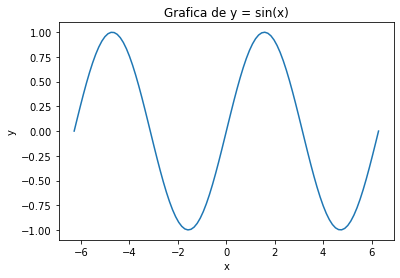

In [5]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(1,1,1) #creamos un canvas con  1 fila, 1 columna y devolvemos una referencia a la primera grafica
#ax = fig.add_subplot(111) 

ax.plot(x,y)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Grafica de y = sin(x)')

plt.show()

El siguiente ejemplo consiste en un figure con 4 graficas(Axes)

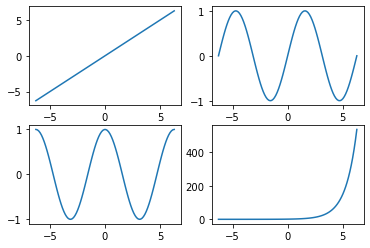

In [6]:
fig  = plt.figure()

# el figure tendra 4 graficas organizadas en 2 filas y 2 columnas
ax1 = fig.add_subplot(2,2,1) #221
ax2 = fig.add_subplot(2,2,2) #222
ax3 = fig.add_subplot(2,2,3)  # 223
ax4 = fig.add_subplot(2,2,4) # 224

ax1.plot(x,x)
ax2.plot(x,np.sin(x))
ax3.plot(x,np.cos(x))
ax4.plot(x,np.exp(x))

plt.show()

#### Estilo de curvas
 
Matplotlib provee múltiples formas de dar estilo a las gráficas y es ampliamente configurable y adaptable,  por esta misma razón la documentación es amplia por lo cual se recomienda consultarla como referencia constantemente al estar trabajando con visualización de datos.
 
Algunas de las características  del estilo de curvas que mas comunmente se configuran y personalizan son:
 
* Color: comúnmente se trabaja con la primera letra ,por ejemplo:
   * r = rojo
   * b = azul(color default)
   * g = verde
   * y = amarillo
 
* Estilo de linea: usado para definir si la gráfica consistirá en  lineas solidas,  o discontinuas, algunos tipos son:
   * -  :linea solida, el tipo default
   * -- :linea discontinua
   * -. :curva discontinua formada por líneas y puntos.
* Grosor de linea

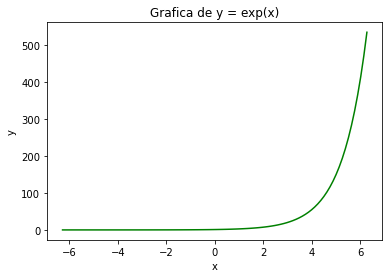

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) #creamos un canvas con  1 fila, 1 columna y devolvemos una referencia a la primera grafica
#ax = fig.add_subplot(111) 

ax.plot(x, np.exp(x) ,color="g") # tambien se pudo usar "green" en lugar de el abreviado "g"

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Grafica de y = exp(x)')

plt.show()

La forma mas comun de trabajar con el estilo de curvas es crear un "string" con la configuración deseada, por ejemplo el string "r-." produce luna gráfica roja con una linea que consiste en -. en cada punto.

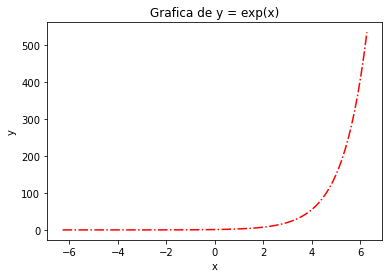

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) #creamos un canvas con  1 fila, 1 columna y devolvemos una referencia a la primera grafica
#ax = fig.add_subplot(111) 

ax.plot(x, np.exp(x) ,"r-.") 

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Grafica de y = exp(x)')

plt.show()

Podemos cambiar el grosor de linea agregando un parametro adicional linewidth o lw:

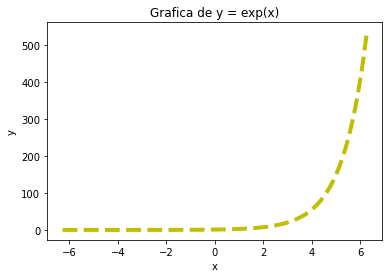

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) #creamos un canvas con  1 fila, 1 columna y devolvemos una referencia a la primera grafica
#ax = fig.add_subplot(111) 

ax.plot(x, np.exp(x) ,"y--",linewidth=4)  #
#ax.plot(x, np.exp(x) ,"y:",lw=4) 

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Grafica de y = exp(x)')

plt.show()

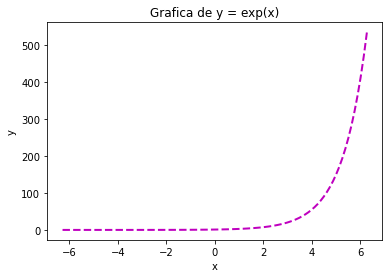

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) #creamos un canvas con  1 fila, 1 columna y devolvemos una referencia a la primera grafica
#ax = fig.add_subplot(111) 

ax.plot(x, np.exp(x) ,"m--",linewidth=2)  #
#ax.plot(x, np.exp(x) ,"y:",lw=4) 

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Grafica de y = exp(x)')

plt.show()

#### Scatterplots

En todos los ejemplos anteriores hemos usado la función "plot", esta es común para graficar funciones matemáticas y en casos donde necesitamos que  todos los puntos en la gráfica estén conectados, en casos donde deseamos graficar únicamente los datos sin líneas que conecten punto con punto, algo muy común en data science cuando se poseen datos pero no se conoce el modelo o función matemática que los relaciona(por ejemplo en la fase de análisis exploratorio), para eso usamos la función **"scatter"**

```
import numpy as np

a = np.array([1,2,3,4])

print(a.ndim)
print(len(a))
print(a.shape)
```

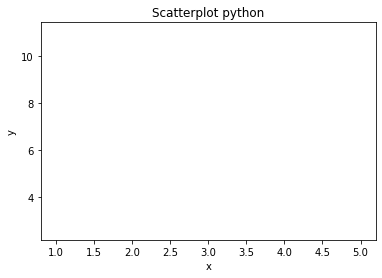

In [11]:
x = np.array([1,2,3,4,5])
y = np.array([2.6,3.9,6.25,7.6,11])

fig = plt.figure()
ax = fig.add_subplot(1,1,1) #creamos un canvas con  1 fila, 1 columna y devolvemos una referencia a la primera grafica
#ax = fig.add_subplot(111) 

ax.scatter(x, y,marker="",color="g")  # experimentar con los siguientes markers o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'#
#ax.scatter(x, y,color="g")  # experimentar con los siguientes markers o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Scatterplot python')

plt.show()

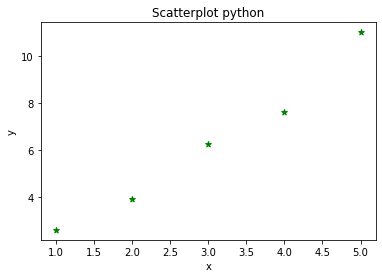

In [12]:
x = np.array([1,2,3,4,5])
y = np.array([2.6,3.9,6.25,7.6,11])

fig = plt.figure()
ax = fig.add_subplot(1,1,1) #creamos un canvas con  1 fila, 1 columna y devolvemos una referencia a la primera grafica
#ax = fig.add_subplot(111) 

ax.scatter(x, y,marker="*",color="g")  # experimentar con los siguientes markers o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'#
#ax.scatter(x, y,color="g")  # experimentar con los siguientes markers o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Scatterplot python')

plt.show()

### Constructores de matrices

NumPy provee diversas funciones para crear matrices , algunas de las cuales ya vimos cuando estudiamos vectores , la diferencia consiste en que ahora ya no usamos un número para indicar el tamaño de un vector, si no una **tupla** de 2 elementos: (m,n) . Algunas de las funciones  que aplican tanto a vectores como a matrices son:

* np.array: crear una matriz a partir de una lista de listas: cada fila es una sublista
* np.zeros: crear una matriz de ceros
* np.ones: crear una matriz de unos
* np.empty: crear una matriz sin importarnos sus valores
* np.full: crear una matriz  con cierto valor
* np.copy: crea un clon o copia de cierta matriz

Algunas funciones específicas de matrices son:

* np.matrix: resultado casi idéntico a la función más general np.array, pero posee algunas propiedades adicionales específicas de listas, por ejemplo notación sencilla para inversas de matrices.
* np.eye: crear una matriz con 1s en su diagonal principal y ceros en el resto
* np.identity : crear una matriz identidad

Algunas funciones que solo aplican a vectores y no a matrices son:

* np.arange
* np.linspace

Existen otras pero estas son posiblemente las mas comunes. Puedes consultar las otras disponibles en: https://docs.scipy.org/doc/numpy/reference/routines.array-creation.html

**Ejercicio**: Investigar y ejemplificar diferencias entre np.array y np.matrix

## Resuolución de ejercicio ##

Considero que el concepto es el siguiente: **Una matriz** es un objeto de dos dimensiones  (arreglos de arreglos) y los **ndarrays** son arreglos con *n* dimensiones. Es importante recalcar que las matrices son una subclase de los ndarrays y por el concepto de herencia obtiene todos los atributos y funciones de dicho objeto.

Recordar que ndarrays son el estándar de vectores, matrices o tensores de numpy y por esto de las funciones dan como resultado objetos ndarrays.


Dentro de las ventajas de trabajar matrices con numpy es la operación vectorizada como la multiplicación de matrices o el producto matricial.



### Ejemplo de ejercicio ###


In [13]:
#Ejemplo de arreglo 1 dimensión
array = np.array([0, 1, 2])
print("Values ",array)
print("Shape: ", array.shape)
print("Rango: ", len(array.shape))
print("Tipo:  ", type(array))

Values  [0 1 2]
Shape:  (3,)
Rango:  1
Tipo:   <class 'numpy.ndarray'>


In [14]:
#Ejemplo de arreglos 2 dimensión
m = np.array([[1, 2, 3],[4,5,6]])
print("Values ", m)
print("Shape: ", m.shape)
print("Rango: ", len(m.shape))
print("Tipo:  ", type(m))

Values  [[1 2 3]
 [4 5 6]]
Shape:  (2, 3)
Rango:  2
Tipo:   <class 'numpy.ndarray'>


In [15]:
#Ejmplo de ndarray Rango 3
nd = np.array([[[1, 2], [3, 4]], 
              [[5, 6], [7, 8]]])
print("Values ",nd)
print("Shape: ", nd.shape)
print("Rango: ", len(nd.shape))
print("Tipo:  ", type(nd))

Values  [[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
Shape:  (2, 2, 2)
Rango:  3
Tipo:   <class 'numpy.ndarray'>


In [16]:
#utilizando np.matrix
m = np.matrix([1, 2, 3])
print("Values ",m)
print("Shape: ", m.shape)
print("Rango: ", len(m.shape))
print("Tipo:  ", type(m))

Values  [[1 2 3]]
Shape:  (1, 3)
Rango:  2
Tipo:   <class 'numpy.matrix'>


In [23]:
#utilizando np.matrix
m = np.matrix([[1, 2, 3],[4,5,6]])
print("Values ",m)
print("Shape: ", m.shape)
print("Rango: ", len(m.shape))
print("Tipo:  ", type(m))

Values  [[1 2 3]
 [4 5 6]]
Shape:  (2, 3)
Rango:  2
Tipo:   <class 'numpy.matrix'>


In [13]:
matriz_1 = np.matrix([[-1,2,3],
                      [-2,0,1],
                      [0,-1,-1]])

tamaño_matriz = matriz_1.shape

print("Rango del tensor:",matriz_1.ndim) #rango del tensor, para matriz es 2
print("Forma o tamaño:",tamaño_matriz) # tupla representando el tamaño de la matríz

print("Matriz de ceros de forma:",tamaño_matriz)
print("Filas:",tamaño_matriz[0])
print("Columnas:",tamaño_matriz[1])
print("Matriz:")
print(matriz_1)
print("Matriz Inversa:")
print(matriz_1.I)

Rango del tensor: 2
Forma o tamaño: (3, 3)
Matriz de ceros de forma: (3, 3)
Filas: 3
Columnas: 3
Matriz:
[[-1  2  3]
 [-2  0  1]
 [ 0 -1 -1]]
Matriz Inversa:
[[ 1. -1.  2.]
 [-2.  1. -5.]
 [ 2. -1.  4.]]


In [14]:
matriz_vacia = np.empty((2,3))

tamaño_matriz = matriz_vacia.shape

print("Rango del tensor:",matriz_vacia.ndim) #rango del tensor, para matriz es 2
print("Forma o tamaño:",tamaño_matriz) # tupla representando el tamaño de la matríz

print("Matriz de ceros de forma:",tamaño_matriz)
print("Filas:",tamaño_matriz[0])
print("Columnas:",tamaño_matriz[1])
print("Matriz:")
print(matriz_vacia)

Rango del tensor: 2
Forma o tamaño: (2, 3)
Matriz de ceros de forma: (2, 3)
Filas: 2
Columnas: 3
Matriz:
[[ 2.  4.  6.]
 [ 8. 10. 12.]]


In [15]:
matriz_ochos = np.full((4,5),8)

tamaño_matriz = matriz_ochos.shape

print("Rango del tensor:",matriz_ochos.ndim) #rango del tensor, para matriz es 2
print("Forma o tamaño:",tamaño_matriz) # tupla representando el tamaño de la matríz

print("Matriz de ceros de forma:",tamaño_matriz)
print("Filas:",tamaño_matriz[0])
print("Columnas:",tamaño_matriz[1])
print("Matriz:")
print(matriz_ochos)

Rango del tensor: 2
Forma o tamaño: (4, 5)
Matriz de ceros de forma: (4, 5)
Filas: 4
Columnas: 5
Matriz:
[[8 8 8 8 8]
 [8 8 8 8 8]
 [8 8 8 8 8]
 [8 8 8 8 8]]


In [16]:
np.empty(4)  # el valor varia, experimentemos cambiando el tipo con ndtype = <tipo>

array([-6.25, -6.  ,  0.  ,  4.  ])

In [17]:
replica_matriz_ochos = np.copy(matriz_ochos)

print(replica_matriz_ochos)

[[8 8 8 8 8]
 [8 8 8 8 8]
 [8 8 8 8 8]
 [8 8 8 8 8]]


**Construir matriz como otra matriz**

Similar al caso de vectores, existen algunas funciones que nos permiten crear matrices "como" otras matrices, es decir de la misma forma pero con posibles diferentes valores:


In [18]:
matriz_nueves = np.full((4,4),9)

ceros = np.zeros_like(matriz_nueves) # np.zeros(matriz_nueves.shape)
unos = np.ones_like(matriz_nueves)
vacio = np.empty_like(matriz_nueves)

print(matriz_nueves)
print(ceros)
print(unos)
print(vacio)

[[9 9 9 9]
 [9 9 9 9]
 [9 9 9 9]
 [9 9 9 9]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
[[      94475628812032  1819513623404378884 -8717278869037512445
    144408465836085518]
 [ 5047136642369716232  3597518701923667988  1291623749228703488
  -3524804806328117486]
 [ 1234849420382634517  2526823982018274868  1599396898099507985
  -5067511118797708284]
 [-6628517167330278727 -6575643997526401795 -1196719801364084739
                     0]]


En otros casos algunas funciones tambien devuelven un array  A de la misma forma de otro B pero con el resultado de aplicar alguna función a este, por ejemplo, el siguiente caso devuelve un nuevo vector con la forma de un vector "x" resultado de calcular el seno trigonoḿetrico sobre cada uno de sus elementos.:

In [19]:
print(np.sin(ceros))
print(np.sin(unos))
print(np.exp(unos))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0.84147098 0.84147098 0.84147098 0.84147098]
 [0.84147098 0.84147098 0.84147098 0.84147098]
 [0.84147098 0.84147098 0.84147098 0.84147098]
 [0.84147098 0.84147098 0.84147098 0.84147098]]
[[2.71828183 2.71828183 2.71828183 2.71828183]
 [2.71828183 2.71828183 2.71828183 2.71828183]
 [2.71828183 2.71828183 2.71828183 2.71828183]
 [2.71828183 2.71828183 2.71828183 2.71828183]]


**Construir un grid** 

En algunos casos es útil y/o necesario construir un "grid" que representa las coordenadas en el plano x,y que sobre las que luego evaluaremos cierta función esto es usado por ejemplo en machine learning para buscar hiper-parametros o visualizar la función de costo respecto de una linea recta respecto de sus parametros.

Para el siguiente ejemplo buscamos crear la matriz que contiene el grid de coordenadas para la función:

$$z = x^{2} + y^{2}$$

<img src="http://3.bp.blogspot.com/-sxwhjwdjdao/UW2GAHeFbbI/AAAAAAAAAas/nu2PqSLDHF0/s1600/g4.jpg">



In [20]:
xv = np.linspace(-10,10,50)
yv = np.linspace(-10,10,50)

# creamos el grid con las coordenadas en el plano x,y
xx,yy = np.meshgrid(xv,yv)

# calculamos el valor de evaluar la función z = f(x,y) sobre las coordenadas en el plano
z = xx**2 + yy**2

# imprimimos la matriz resultado de calcular f(x,y), 
#cuando estudiemos visualización de datos esta matriz sería graficada
print(z)

[[200.         192.00333195 184.33985839 ... 184.33985839 192.00333195
  200.        ]
 [192.00333195 184.00666389 176.34319034 ... 176.34319034 184.00666389
  192.00333195]
 [184.33985839 176.34319034 168.67971678 ... 168.67971678 176.34319034
  184.33985839]
 ...
 [184.33985839 176.34319034 168.67971678 ... 168.67971678 176.34319034
  184.33985839]
 [192.00333195 184.00666389 176.34319034 ... 176.34319034 184.00666389
  192.00333195]
 [200.         192.00333195 184.33985839 ... 184.33985839 192.00333195
  200.        ]]


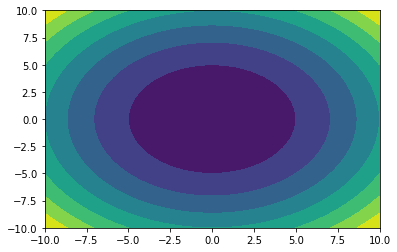

In [21]:
plt.contourf(xx,yy,z)
plt.show()

**Construir matriz luego de redimensionar otro Tensor**

En muchos casos necesitamos crear una matriz luego de redimensionar otro Tensor(un vector u otra matriz),es decir cambiar su forma, esto es algo común en DS y lo logramos a partir de la función **np.reshape**

In [22]:
vector = np.arange(10)

matriz = np.reshape(vector,(2,5))

print("Vector:",vector)
print("Matriz:")
print(matriz)

Vector: [0 1 2 3 4 5 6 7 8 9]
Matriz:
[[0 1 2 3 4]
 [5 6 7 8 9]]


In [23]:
vector = np.arange(10)

matriz = np.reshape(vector,(5,2))

print("Vector:",vector)
print("Matriz:")
print(matriz)

Vector: [0 1 2 3 4 5 6 7 8 9]
Matriz:
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


In [24]:
matriz = np.reshape(np.arange(20),(5,4))

print(matriz)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]


In [25]:
matriz_reshaped = np.reshape(matriz,(4,5))

print(matriz_reshaped)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


**Contruir matriz identidad**

La matriz identidad es aquella matriz cuadrada para la cual los elementos de su diagonal principal son igual 1 y el resto a 0. Y cumple con la propiedad de ser el elemento neutro del producto de matrices(similar al 1 con escalares , 1xn = n ) lo cual significa que el resultado de aplicar el producto de matrices entre una matriz A y la matriz identidad I es igual a A:
$$AI = A$$

In [26]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [27]:
np.identity(2)

array([[1., 0.],
       [0., 1.]])

In [28]:
matriz_identidad4 = np.identity(4)

print(matriz_identidad4)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


Podemos utilizar broadcasting y una matriz identidad para construir una matriz cuadrada con cierto valor en su diagonal principal . El siguiente ejemplo crea una matriz  cuadrada de 4x4 inicializada con 5 en su diagonal principal y 0 en el resto de la matriz.

In [29]:
matriz_identidad4*5

array([[5., 0., 0., 0.],
       [0., 5., 0., 0.],
       [0., 0., 5., 0.],
       [0., 0., 0., 5.]])

El concepto de matriz identidad existe solo para matrices cuadradas, pero hay casos donde se necesita usar matrices no cuadradas con 1 en su diagonal principal y 0 en cualquier otra posición, para esto podemos usar:

**np.eye(filas,columnas)**

In [30]:
np.eye(3,5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [31]:
np.eye(5,3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 0.]])

Matriz identidad on np.eye

In [32]:
np.eye(3,3) #np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Podemos utilizar un  tercer parametro en np.eye para especificar la digonal a inicializar con 1(no necesariamente la principal)

In [33]:
np.eye(5,3,1)

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [34]:
np.eye(5,3,2)

array([[0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [35]:
np.eye(5,3,-1)

array([[0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [36]:
np.eye(5,3,-2)

array([[0., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

**Contruir matriz Diagonal**

Una matriz diagonal , es una matriz cuadrada de n*n la cual tiene todos sus elementos igual a 0, excepto los de su diagonal principal que pueden ser cualquier valor diferente de 0(a diferencia de cuando usamos np.eye o matrices identidad donde el valor de la diagonal  es  igual a 1). Para crear matrices diagonales en numpy podemos usar **np.diag** enviando como parametro un vector de n elementos que pertenecen a la diagonal principal.

In [37]:
matriz_diagonal = np.diag([1,2,3,4,5])

print(matriz_diagonal)

[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


In [38]:
v = [5,4,3,2,1] #resultado de otro calculo
matriz_diagonal = np.diag(v)

print("Vector de elementos en la diagonal:",v)
print("Matriz diagonal:")
print(matriz_diagonal)

Vector de elementos en la diagonal: [5, 4, 3, 2, 1]
Matriz diagonal:
[[5 0 0 0 0]
 [0 4 0 0 0]
 [0 0 3 0 0]
 [0 0 0 2 0]
 [0 0 0 0 1]]


### Diagonal principal de una matriz

La diagonal principal(a veces solo llamada diagonal) es  el conjunto de elementos conformados al recorrer la matriz desde la primera fila y primera columna,luego segunda fila y segunda columna y así sucesivamente hasta donde el tamaño de la matriz permite.

<img src="http://navarrof.orgfree.com/Docencia/MatematicasI/UT4/ut4t1f8.gif">

In [39]:
matriz = np.array([[1,2,3],
                   [5,6,7],
                   [8,9,10]])

In [40]:
print("Matriz:")
print(matriz)

Matriz:
[[ 1  2  3]
 [ 5  6  7]
 [ 8  9 10]]


In [41]:
matriz.diagonal()

array([ 1,  6, 10])

In [42]:
np.diag(matriz)

array([ 1,  6, 10])

In [43]:
np.diag(matriz)

array([ 1,  6, 10])

In [44]:
matriz_cuadrada = np.reshape(np.arange(16),(4,4))

print(matriz_cuadrada)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [45]:
matriz_cuadrada.diagonal()

array([ 0,  5, 10, 15])

### Accediendo elementos específicos de una matriz

Similar a cuando estudiamos colecciones como listas y tuplas , en muchos casos necesitamos acceder a elementos específicos de cierta matriz , en algunos casos únicamente para consultar los datos que esta contiene o bien para utilizarlos en alguna otra operación o en otros casos para modificar solo ciertos elementos de la matriz. Cuando estudiamos vectores no dedicamos mucho tiempo a esto ya que es exactamente igual al caso de listas (lo cual ya habiamos visto a detalle antes)  pero para el caso de matrices(y tensores de mayor dimensionalidad como veremos) existen algunos detalles adicionales que necesitamos conocer.

La buena parte de esto es que aun que hay algunos detalles adicionales, el acceso a elementos sigue basado en lo que aprendimos de **indexing**  y **slicing** y todo lo que aprendimos aplica también para matrices.

Estudiaremos el acceso a elementos de la matriz dividio en 3 partes:

1. Acceso a filas y columnas completas(una única fila  o columna).
2. Acceso a elementos específicos de la matriz(cierta fila, cierta columna).
3. Multiples filas y/o múltiples columnas de la matriz combinando los 2 anteriores.

**Nota** No olvidemos que en Python el primer elemento se representa con la posicion 0 y el ultimo con la posicion n-1, en matemática se acostumbra a hacerlo de 1 a n .


#### Acceder a filas completas: 
Cuando necesitamos acceder a filas completas de la matriz usamos la sintaxis conocida de:

**A[indice]**

Donde
* A = la matriz de "m" filas y "n" columnas,de la cual queremos acceder una fila
* indice = el número de fila a acceder(de -m a m-1)

Si la matriz esta organizada de manera tal que cada fila representa una observación u ocurrencia de un evento y cada columna características de esta observación u ocurrencia ,el acceder a cierta fila implica acceder a cierta observación específica.

In [46]:
matriz = np.array([[1,2,3],
                   [4,5,6],
                   [7,8,9]])

print(matriz[0]) #acceder a la primera fila
print(matriz[2]) #acceder a la última fila m-1

[1 2 3]
[7 8 9]


In [47]:
print(matriz[-1]) # acceder a la última fila con indice negativo
print(matriz[-3]) # acceder a la primera fila -m con  indice negativo

[7 8 9]
[1 2 3]


In [48]:
print(matriz[1])  # acceder a la segunda fila con indice positivo
print(matriz[-2]) # acceder a la segunda fila con indice negativo

[4 5 6]
[4 5 6]


Podemos asignar a una variable la fila accesada 



In [49]:
fila2 = matriz[1]

fila2_triplicada =fila2*3
print(fila2,fila2_triplicada)

[4 5 6] [12 15 18]


#### Acceder a columnas completas: 
Cuando necesitamos acceder a columnas completas de la matriz usamos la sintaxis conocida de:

**A[:,indice]**

Donde
* A = la matriz de "m" filas y "n" columnas,de la cual queremos acceder una columna.
* indice = el número de columna a acceder(de -n a n-1)

Si la matriz esta organizada de manera tal que cada fila representa una observación u ocurrencia de un evento y cada columna características de esta observación u ocurrencia ,el acceder a cierta columna implica acceder a cierta característica.

**nota** : Al igual que con listas, usamos ":" para hacer slicing que en este caso indica todas las filas(mas detalles en la siguiente sección). 

In [50]:
matriz = np.array([[1,2,3],
                   [4,5,6],
                   [7,8,9]])

print(matriz)
print("Columnas individuales:")
print(matriz[:,0]) #acceder a la primera columna
print(matriz[:,2]) #acceder a la última columna n-1

[[1 2 3]
 [4 5 6]
 [7 8 9]]
Columnas individuales:
[1 4 7]
[3 6 9]


In [51]:
print(matriz)
print("Columnas individuales:")
print(matriz[:,-1]) # acceder a la última columna con indice negativo
print(matriz[:,-3]) # acceder a la primera columna -n con  indice negativo

[[1 2 3]
 [4 5 6]
 [7 8 9]]
Columnas individuales:
[3 6 9]
[1 4 7]


In [52]:
print(matriz)
print("Columnas individuales:")
print(matriz[:,1])  # acceder a la segunda columna con indice positivo
print(matriz[:,-2]) # acceder a la segunda columna con indice negativo

[[1 2 3]
 [4 5 6]
 [7 8 9]]
Columnas individuales:
[2 5 8]
[2 5 8]


In [54]:
columna3 = matriz[:,2]

columna3_triplicada =columna3*3
print(matriz)
print(columna3,columna3_triplicada)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[3 6 9] [ 9 18 27]


Si consultamos el atributo shape en un vector obtenido al acceder a una fila o columna específica podemos ver que tenemos una **dimensión desconocida** o no específicada. En algunos casos puede llevar a comportamientos no predecibles  y/o inesperados.

In [55]:
columna3.shape

(3,)

En algunos casos queremos eliminar este compartamiento y asegurarnos de poseer un valor de 1 en lugar del valor no especifidado , podemos para esto usar la función "expand_dims" e indicarle si queremos convertir el vector de n elementos en una matriz de 1 fila y columnas o n filas y una columna

In [56]:
una_fila_3_cols = np.expand_dims(columna3,0) # el parametro 0 indica crear una matriz 1 fila con n columnas

print(una_fila_3_cols)
print(una_fila_3_cols.shape)

[[3 6 9]]
(1, 3)


In [57]:
una_col_3_filas = np.expand_dims(columna3,1) # el parametro 1 indica crear una matriz de n filas y 1 columna

print(una_col_3_filas)
print(una_col_3_filas.shape)

[[3]
 [6]
 [9]]
(3, 1)


Aun que menos común y poco necesario , también podemos realizar la operacion contraria:convertir 1 matriz con ya sea 1 sola fila o 1 sola columna, en un vector con una dimensión no definida. usando **np.squeeze**

In [58]:
print(np.squeeze(una_col_3_filas))
print(np.squeeze(una_col_3_filas).shape)


[3 6 9]
(3,)


#### Acceder a elementos específicos(indexing): 
En muchos casos necesitamos acceder a elementos específicos de la matriz ya sea como consulta, usarlos en otro cálculo o para cambiar su valor, podemos entonces acceder a elementos específicos de la matriz a partir de su posición (fila y columna).

**A[fila,columna]**

Donde
* A = la matriz de "m" filas y "n" columnas,de la cual queremos acceder un elemento.
* fila = el número de columna a acceder(de -m a m-1)
* columna = el número de columna a acceder (de -n a n-1)

Si la matriz esta organizada de manera tal que cada fila representa una observación u ocurrencia de un evento y cada columna características de esta observación u ocurrencia ,el acceder a un elemento localizado en cierta fila y columna se interpreta como: la característica j de la observación i.

In [59]:
matriz = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]])

print(matriz)
print("Elementos individuales:")
print(matriz[0,0]) # acceder a elemento en primera fila y primera columna
print(matriz[0,2]) # acceder a elemento en la primera fila la última columna n-1

[[1 2 3]
 [4 5 6]
 [7 8 9]]
Elementos individuales:
1
3


In [60]:
print(matriz)
print("Elementos individuales:")
print(matriz[0,-1]) # acceder a elemento en la primera fila y la última columna con indice negativo
print(matriz[-3,-3]) # acceder a elemento en la primera fila y la primera columna -n con  indice negativo

[[1 2 3]
 [4 5 6]
 [7 8 9]]
Elementos individuales:
3
1


In [61]:
print(matriz)
print("Elementos individuales:")
print(matriz[1,1])  # acceder elemento en la segunda fila con indice positivo y  la segunda columna con indice positivo
print(matriz[-2,-2]) # accederelemento en la segunda fila y  la segunda columna con indice negativo

[[1 2 3]
 [4 5 6]
 [7 8 9]]
Elementos individuales:
5
5


**Nota** La sintaxis vista utilizando un unico par de corchetes y separar el indice de filas del de columnas por comas es la forma recomendada de hacerlo tanto por performance y legibilidad, la siguiente celda logra el mismo resultado de la anterior pero es menos eficiente, esto por que hay 2 operaciones en lugar de 1:

* Primero se accede a una fila de la matriz y se crea un vector intermedio temporal para esta.
* Luego accedemos a un elemento del vector intermedio temporal.

In [ ]:
print(matriz)
print("Elementos individuales:")
print(matriz[1][1])  # acceder elemento en la segunda fila con indice positivo y  la segunda columna con indice positivo
print(matriz[-2][-2]) # acceder elemento en la segunda fila y  la segunda columna con indice negativo

[[1 2 3]
 [4 5 6]
 [7 8 9]]
Elementos individuales:
5
5


#### Acceder sub-porciones de una matriz(slicing): 
En algunos casos necesitamos acceder sub-porciones de la matriz, por ejemplo casos como los siguientes:
* Las primeras 3 filas , últimas 2 columnas.
* Las últimas 5 filas , las columnas 2,4,6.
* Las filas de la 10 a la 20 , primeras 5 columnas.
* Ultima fila , últimas 3 columnas

Estos requieren acceder más de una fila, o mas de una columna(o ambos casos) por lo tanto no podemos específicar solo una fila o solo una columna como en los ejemplos anteriores. Por suerte podemos extender el concepto de slicing ya estudiado a este caso, solo necesitamos pensar cada dimensión de manera individual.

Utilizaremos nuevamente el operador ":" para indicar sub-porciones, y pensamos de manera independiete filas y columnas por lo cual podemos usar hasta  2 operadores ":" al acceder elementos de una matriz.


**A[fila_inicio:fila_fin,columna_inicio:columna_fin]**

Donde
* A = la matriz de "m" filas y "n" columnas,de la cual queremos acceder una sub-porcion
* fila_inicio
* fila_fin
* columna_inicio
* columna_fin

Otra manera de acceder a múltiples columnas o filas de una matriz es usando una lista con los indices deseados, por ejemplo si deseamos acceder a la primera y quinta fila podemos usar una lista con los indices [0,4].


**A[lista_filas,lista_columnas]**

Donde
* A = la matriz de "m" filas y "n" columnas,de la cual queremos acceder una sub-porcion
* lista_filas: lista de las filas  a acceder
* lista_columnas: lista de las columnas a acceder

O bien podemos combinar estos 2 casos y usar ":" para indicar filas(o columnas) y una lista para indicar columnas(o filas).

In [62]:
matriz = np.array([[1,2,3],
                   [4,5,6],
                   [7,8,9],
                   [10,11,12]])

print(matriz)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


* Primeras 3 filas ,últimas 2 columnas 

In [ ]:
print(matriz[0:3,-2:])

[[2 3]
 [5 6]
 [8 9]]


* Las últimas 2 filas , las columnas 0,2

In [63]:
print(matriz[-2:,[0,2]])

[[ 7  9]
 [10 12]]


* Las filas de la 1 a la 2 , primeras 2 columnas.

In [ ]:
print(matriz[1:3,:2]) # recordemos que el limite superior es no incluyente por lo tanto usamos 3 en lugar de 2

[[4 5]
 [7 8]]


* Ultima fila , últimas 2 columnas

In [64]:
print(matriz[-1,-2:])

[11 12]


In [65]:
print("Matriz:")
matriz

Matriz:


array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

### Matriz transpuesta o Transpuesta de una Matriz

La transpuesta de una matriz A es una nueva matriz que puede ser definida según cualquiera de las descripciones comunes a continuación:

* Matriz que se obtiene al reflejar la matriz sobre su diagonal principal.
* Matriz que se obtiene al convertir filas a columnas y columnas a filas.

<img src="https://4.bp.blogspot.com/-N5CZYpsTOmc/WLv0zcBnKII/AAAAAAAAaCs/HSsDvDA5KnMbplqnYz1HMuj5QVSpaI54gCLcB/s1600/Traspuesta_ejemplos.png">

En data science es común utilizar la transposición en casos donde debemos trabajar y combinar en un mismo proyecto 2 datasets con distinta orientación, por ejemplo en deep learning en algunos casos se poseen  y deben integrar datasets donde uno de ellos esta como: 1 row por observación  y una columna por feature, y otro dataset donde estan almacenados como 1 row por característica o feature y 1 columna por observación.

**Nota**: siempre debemos tener en cuenta el significado y/o interpretación de una matriz y trabajar consistentemente con este significado, esto toma mayor importancia al combinar 2 datasets como en el ejemplo anterior.

In [66]:
print("Matriz:")
matriz


Matriz:


array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [67]:
print("Usando transpose():")
matriz.transpose()

Usando transpose():


array([[ 1,  4,  7, 10],
       [ 2,  5,  8, 11],
       [ 3,  6,  9, 12]])

In [ ]:
print("Usando .T")
matriz.T

Usando .T


array([[ 1,  4,  7, 10],
       [ 2,  5,  8, 11],
       [ 3,  6,  9, 12]])

In [68]:
matriz_cuadrada = np.reshape(np.arange(16),(4,4))
print("Matriz:")
matriz_cuadrada

Matriz:


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [69]:
print("Usando transpose():")
matriz_cuadrada.transpose()

Usando transpose():


array([[ 0,  4,  8, 12],
       [ 1,  5,  9, 13],
       [ 2,  6, 10, 14],
       [ 3,  7, 11, 15]])

In [70]:
print("Usando .T")
matriz_cuadrada.T

Usando .T


array([[ 0,  4,  8, 12],
       [ 1,  5,  9, 13],
       [ 2,  6, 10, 14],
       [ 3,  7, 11, 15]])

In [71]:
matriz_cuadrada

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

### Concatenar matrices

De manera similar a la concatenación de vectores para crear un nuevo vector, podemos concatenar matrices para obtener una nueva matriz , pero ahora poseemos 2 opciones: 

1. Concatenar por fila.
2. Concatenar por columna.

Similar a hstack cuando trabajamos con vectores, para concatenar matrices usaremos 3 funciones.

1. **np.vstack**: concatenar verticalmente o por fila
2. **np.hstack**: concatenar horizontalmente o por columna
3. **np.concatenate**: utiliza un parametro nombrado axis para indicar cual de las 2 operaciones realizar , 0 = por fila , 1 = por columna.

In [72]:
ceros = np.zeros((2,4)) #2 filas y 4 columnas de ceros
unos = np.ones((2,3)) # 2 filas y 3 columnas de unos

print(ceros)
print(unos)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]]


In [ ]:
ceros = np.zeros((2,4)) #2 filas y 4 columnas de ceros
unos = np.ones((2,3)) # 2 filas y 3 columnas de unos

np.hstack((ceros,unos))

array([[0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.]])

In [73]:
a = np.array((1,2,3))
b = np.array((2,3,4))
np.hstack((a,b))

array([1, 2, 3, 2, 3, 4])

In [74]:
matriz1 = np.array([[1,2,3],
                    [4,5,6]])
matriz2 = np.array([[-1,-2,-3],
                    [-4,-5,-6]])

nueva_matriz = np.hstack((matriz1,matriz2))

print(nueva_matriz)
print("Forma:",nueva_matriz.shape)

[[ 1  2  3 -1 -2 -3]
 [ 4  5  6 -4 -5 -6]]
Forma: (2, 6)


In [82]:
matriz1 = np.array([[1,2,3], 
                    [4,5,6]])

#agregando variables a cada observacon
np.hstack((matriz1,np.ones(shape=(matriz1.shape[0],1)))) #ejemplo para la parte de proyecto de agregar una columna de 1s

array([[1., 2., 3., 1.],
       [4., 5., 6., 1.]])

In [83]:
print(matriz1)
print(matriz2)

[[1 2 3]
 [4 5 6]]
[[-1 -2 -3]
 [-4 -5 -6]]


In [ ]:
nueva_matriz = np.vstack((matriz1,matriz2)) # agregando observaciones con el mismo numero de variables

print(nueva_matriz)
print("Forma:",nueva_matriz.shape)

[[ 1  2  3]
 [ 4  5  6]
 [-1 -2 -3]
 [-4 -5 -6]]
Forma: (4, 3)


In [85]:
print(matriz1)
print(matriz2)

[[1 2 3]
 [4 5 6]]
[[-1 -2 -3]
 [-4 -5 -6]]


In [86]:
nueva_matrix = np.concatenate((matriz1,matriz2),axis=1)

print(nueva_matriz)
print("Forma:",nueva_matriz.shape)

[[ 1  2  3 -1 -2 -3]
 [ 4  5  6 -4 -5 -6]]
Forma: (2, 6)


### ufuncs(universal functions)

Ufuncs son funciones que trabajan de manera general independiente de la dimension del objeto al que sean aplicadas, esto significa que la misma función puede ser utilizada sobre valores **escalares**  o sobre **tensores** de cualquier dimensión, en este caso sobre matrices. Cuando es aplicada sobre tensores esta trabaja elemento por elemento soportando "broadcasting" .

NumPy provee una gran colección de ufuncs comunes en ciencias y que serán muy útiles en data science, ya hemos usado algunas por ejemplo: **np.sin(tensor)** , muchas comunes y que te serán familares son:

* np.sign: determinar el signo de un número
* np.abs: valor absoluto de un número
* np.cos: coseno de un angulo en radianes
* np.sin : seno de un angulo en radianes
* np.tan : tangente de un angulo en radianes
* np.exp : función exponencial e** x
* np.log: logaritmo natural
* np.log10 : logaritmo base 10
* np.log2 : logaritmo base 2
* np.sqrt : raiz cuadrada
* np.power : potenciacion

Al ser aplicadas sobre matrices , las ufuncs obtienen como resultado una matriz con la misma forma de la matriz sobre la que se ejecuta la función resultado de aplicar la función elemento por elemento.

Al trabajar una aplicación numérica/científica es recomendable tener a la mano la documentación de las funciones disponibles : https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.math.html

#### Nota: 
En algunos casos requeriremos crear nuestras propias funciones y es recomendable que se apeguen a las ufuncs, es decir que se puedan aplicar independiente de la dimensión del objeto al que se aplican, que soporten broadcasting y muy importante **que su definición evite ciclos y use operaciones vectorizadas y otras ufuncs** , esto será parte de los criterios de evaluación en tareas y exámenes en este curso.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level f

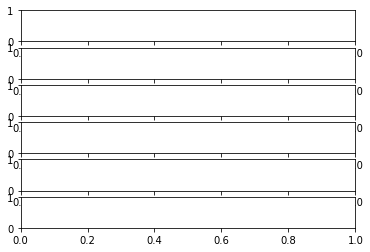

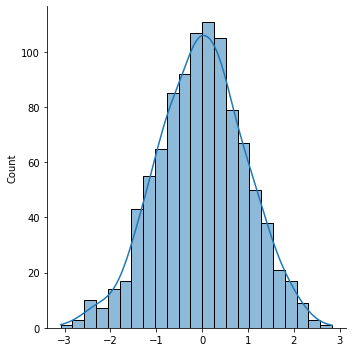

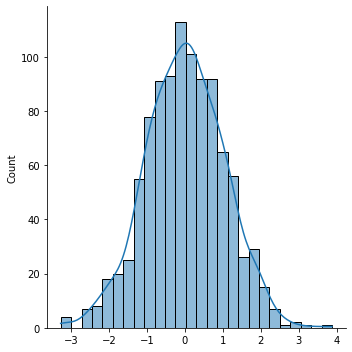

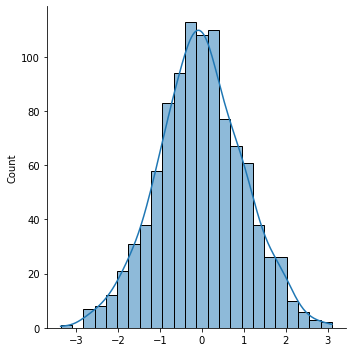

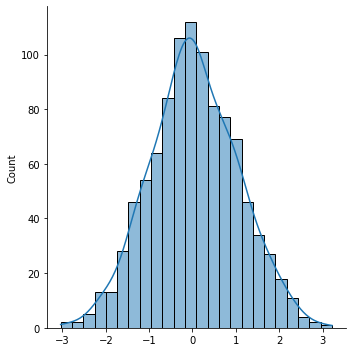

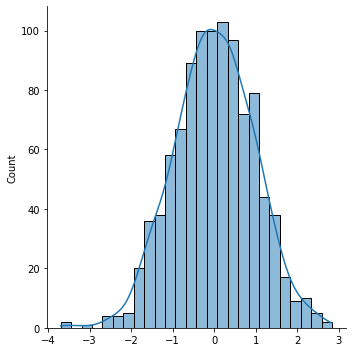

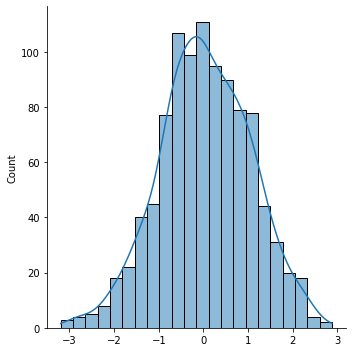

In [92]:
import numpy as np
import seaborn as sns #instalarlo con anaconda
from matplotlib import pyplot as plt 

x = np.random.randn(1000,6)

fig, axs = plt.subplots(nrows=6)

for i in range(6):
  sns.displot(x[:,i], kde=True,ax=axs[i])

plt.show()

In [ ]:
bool(10) and True 

True

In [88]:
x = np.matrix([[1,2,3,4],
               [5,6,7,8],
               [-1,-2,-3,-4]])

print("Signo:")
print(np.sign(x))
print("Valor absoluto:")
print(np.abs(x))
print("Coseno:")
print(np.cos(x))
print("Seno:")
print(np.sin(x))
print("Tangente:")
print(np.tan(x))
print("Exponencial:")
print(np.exp(x))
print("Logaritmo natural:")
print(np.log(x))

Signo:
[[ 1  1  1  1]
 [ 1  1  1  1]
 [-1 -1 -1 -1]]
Valor absoluto:
[[1 2 3 4]
 [5 6 7 8]
 [1 2 3 4]]
Coseno:
[[ 0.54030231 -0.41614684 -0.9899925  -0.65364362]
 [ 0.28366219  0.96017029  0.75390225 -0.14550003]
 [ 0.54030231 -0.41614684 -0.9899925  -0.65364362]]
Seno:
[[ 0.84147098  0.90929743  0.14112001 -0.7568025 ]
 [-0.95892427 -0.2794155   0.6569866   0.98935825]
 [-0.84147098 -0.90929743 -0.14112001  0.7568025 ]]
Tangente:
[[ 1.55740772 -2.18503986 -0.14254654  1.15782128]
 [-3.38051501 -0.29100619  0.87144798 -6.79971146]
 [-1.55740772  2.18503986  0.14254654 -1.15782128]]
Exponencial:
[[2.71828183e+00 7.38905610e+00 2.00855369e+01 5.45981500e+01]
 [1.48413159e+02 4.03428793e+02 1.09663316e+03 2.98095799e+03]
 [3.67879441e-01 1.35335283e-01 4.97870684e-02 1.83156389e-02]]
Logaritmo natural:
[[0.         0.69314718 1.09861229 1.38629436]
 [1.60943791 1.79175947 1.94591015 2.07944154]
 [       nan        nan        nan        nan]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in log


In [89]:
print("Logaritmo base 2:")
print(np.log2(x))

Logaritmo base 2:
[[0.         1.         1.5849625  2.        ]
 [2.32192809 2.5849625  2.80735492 3.        ]
 [       nan        nan        nan        nan]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log2
  


In [90]:
print("Raiz cuadrada:")
print(np.sqrt(x))

Raiz cuadrada:
[[1.         1.41421356 1.73205081 2.        ]
 [2.23606798 2.44948974 2.64575131 2.82842712]
 [       nan        nan        nan        nan]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


In [91]:
print("Exponenciacion(cuadrado):")
print(np.power(x,2))

Exponenciacion(cuadrado):
[[ 1  4  9 16]
 [25 36 49 64]
 [ 1  4  9 16]]


#### Nota: 
En algunos casos requeriremos crear nuestras propias funciones y es recomendable que se apeguen a las ufuncs, es decir que se puedan aplicar independiente de la dimensión del objeto al que se aplican, que soporten broadcasting y muy importante **que su definición evite ciclos y use operaciones vectorizadas y otras ufuncs** , esto será parte de los criterios de evaluación en tareas y exámenes en este curso.